In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as ms
from sklearn.preprocessing import Imputer
import knn_impute as knn
#from fancyimpute import KNN
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.shape,test.shape

((891, 12), (418, 11))

In [4]:
train_orginal = train.copy()
test_orginal  = test.copy()

In [5]:
train.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

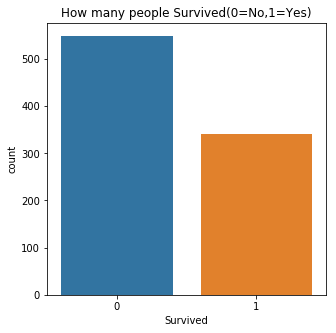

In [7]:
plt.figure(figsize=(5,5))
plt.title('How many people Survived(0=No,1=Yes)')
locs, labels = plt.xticks()
sns.countplot(train['Survived'])

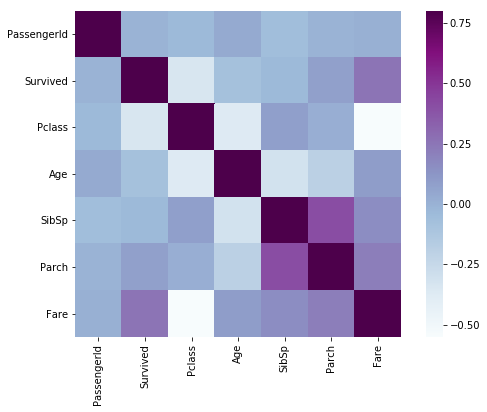

In [8]:
# Print correlation matrix
matrix = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

In [9]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [10]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

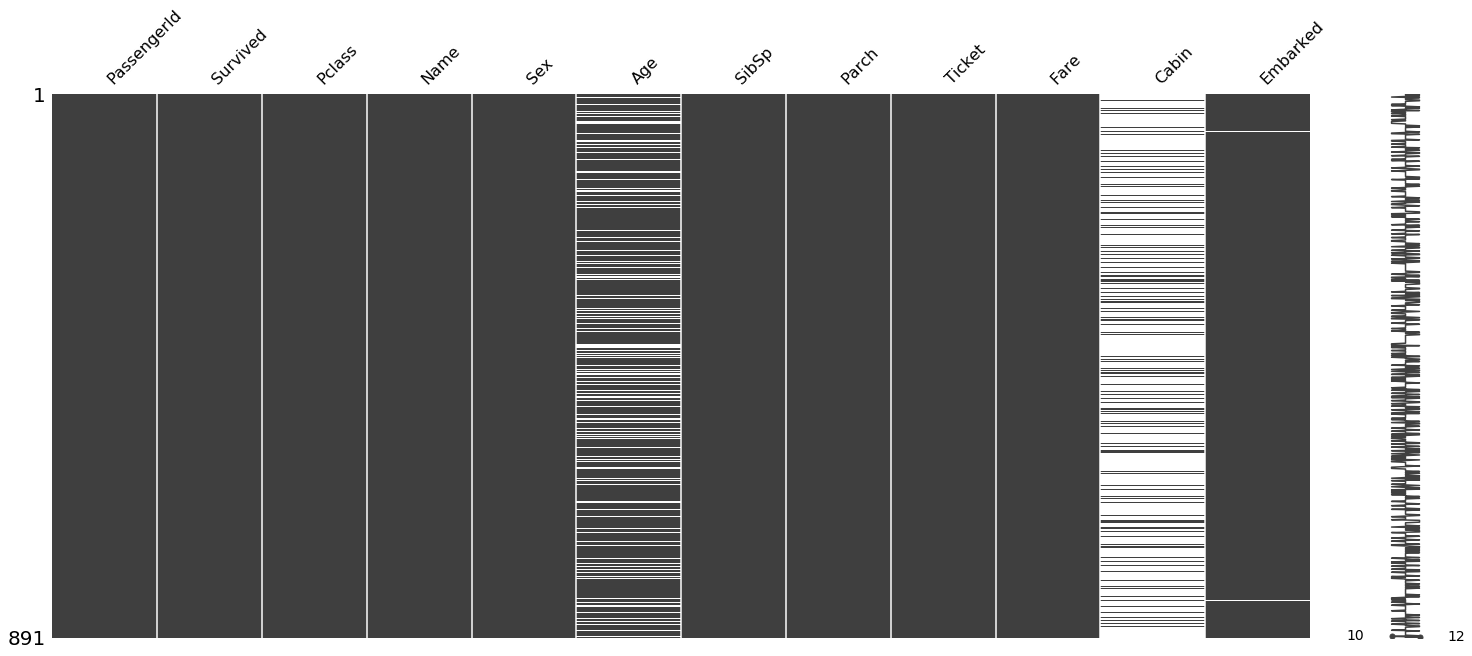

In [11]:
ms.matrix(train)

In [12]:
age_backup=knn.knn_impute(target=train['Age'], attributes=train.drop(['Age', 'PassengerId'], 1),
                                    aggregation_method="median", k_neighbors=10, numeric_distance='euclidean',
                                    categorical_distance='hamming', missing_neighbors_threshold=0.8)

In [13]:
train['Age']=age_backup

In [14]:
train.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [15]:
gender = {'male': 1, 'female': 0}
train['Sex'] = train['Sex'].map(gender)

In [16]:
names=train['Name']
cabin=train['Cabin']
embark=train['Embarked']

In [17]:
train=train.drop('Name',axis=1)
train=train.drop('Cabin',axis=1)
train=train.drop('Embarked',axis=1)
train=train.drop('Ticket',axis=1)

In [18]:
PassengerId=train['PassengerId']
train=train.drop('PassengerId',axis=1)

In [19]:
train['Age'].fillna(train['Age'].mode()[0], inplace=True)


In [20]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [21]:
train.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare
0         0       3    1  22.0      1      0   7.2500
1         1       1    0  38.0      1      0  71.2833
2         1       3    0  26.0      0      0   7.9250
3         1       1    0  35.0      1      0  53.1000
4         0       3    1  35.0      0      0   8.0500

In [22]:
y = train["Survived"]
X = train.drop('Survived',1)
#imp = Imputer(missing_values="NaN", strategy='mean', axis=0)

#X= imp.fit_transform(X)


In [23]:
# Importing packages for cross validation and logistic regression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
y_pred = classifier.predict(X)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)
print(cm)
score = accuracy_score(y, y_pred)
print('accuracy_score',score)

[[480  69]
 [106 236]]
accuracy_score 0.8035914702581369


In [25]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X, y)
y_pred = classifier.predict(X)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)
print(cm)
score = accuracy_score(y, y_pred)
print('accuracy_score',score)

[[484  65]
 [100 242]]
accuracy_score 0.8148148148148148


In [26]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X, y)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)
print(cm)
score = accuracy_score(y, y_pred)
print('accuracy_score',score)

[[484  65]
 [100 242]]
accuracy_score 0.8148148148148148


In [27]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X, y)

# Predicting the Test set results
y_pred = classifier.predict(X)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)
print(cm)
score = accuracy_score(y, y_pred)
print('accuracy_score',score)

[[536  13]
 [ 67 275]]
accuracy_score 0.9102132435465768


In [28]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# calculate AUC
auc = roc_auc_score(y, y_pred)
print('AUC: %.3f' % auc)

AUC: 0.890


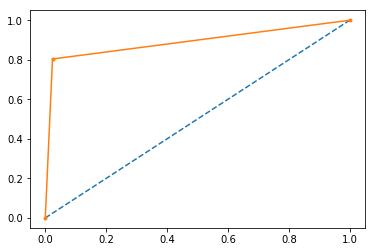

In [29]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y, y_pred)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [30]:
# calculate F1 score
from sklearn.metrics import f1_score
f1 = f1_score(y, y_pred)
print(f1)

0.873015873015873


f1=0.873 auc=0.917 ap=0.843


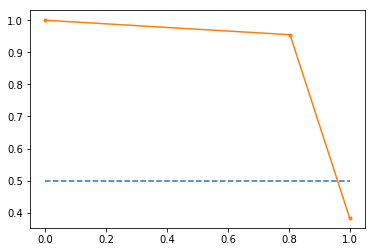

In [31]:
# calculate precision-recall curve
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
precision, recall, thresholds = precision_recall_curve(y, y_pred)
# calculate F1 score
f1 = f1_score(y, y_pred)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y, y_pred)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the roc curve for the model
plt.plot(recall, precision, marker='.')
# show the plot
plt.show()

### using classification_report we can decide which model will be better

In [42]:
from sklearn.metrics import classification_report
target_names = ['Surived','Died']
print(classification_report(y, y_pred, target_names=target_names))

             precision    recall  f1-score   support

    Surived       0.98      1.00      0.99       549
       Died       1.00      0.97      0.98       342

avg / total       0.99      0.99      0.99       891



In [41]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X, y)

# Predicting the Test set results
y_pred = classifier.predict(X)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)
print(cm)
score = accuracy_score(y, y_pred)
print('accuracy_score',score)

[[548   1]
 [ 11 331]]
accuracy_score 0.9865319865319865


In [39]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X, y)

# Predicting the Test set results
y_pred = classifier.predict(X)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)
print(cm)
score = accuracy_score(y, y_pred)
print('accuracy_score',score)

[[544   5]
 [ 15 327]]
accuracy_score 0.9775533108866442


In [37]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X, y)

# Predicting the Test set results
y_pred = classifier.predict(X)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)
print(cm)
score = accuracy_score(y, y_pred)
print('accuracy_score',score)

[[466  83]
 [101 241]]
accuracy_score 0.7934904601571269
